## Data Clustering of Tumor Data

### Clustering with K-means clustering

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.cm as cm
import os
%matplotlib inline
from sklearn import preprocessing
from sklearn.cluster import KMeans
from subprocess import check_output
current_working_directory = os.getcwd()
print(f"current working directory: {current_working_directory}")
#
print(check_output(["ls", "data"]).decode("utf8"))


current working directory: /home/michellewli/quantum_programming_project/clustering_tumor_data
data.csv
data.csv:Zone.Identifier
data2.csv:Zone.Identifier
data_10.csv
data_15.csv
data_20.csv
data_25.csv
data_30.csv
data_50.csv



In [28]:
# Read the data file
datafile = 'data/data_20.csv'
data = pd.read_csv(datafile)
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer

# Clean and preprocess the data
data = data.drop('id', axis=1, errors='ignore')
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
datas = pd.DataFrame(scale(data.iloc[:, 1:32]))
datas.columns = list(data.iloc[:, 1:32].columns)
datas['diagnosis'] = data['diagnosis']
data_drop = datas.drop('diagnosis', axis=1)

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with 'median' or 'constant' if needed
X = imputer.fit_transform(data_drop)

# Check for missing values
print(f"Number of missing values in X: {np.isnan(X).sum()}")

# Run t-SNE
tsne = TSNE(verbose=1, perplexity=3, n_iter=4000)
Y = tsne.fit_transform(X)

# Display results
print("t-SNE transformation complete. Resulting shape:", Y.shape)


Number of missing values in X: 0
[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...


/home/michellewli/quantum_programming_project/clustering_tumor_cells/venv/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:246: RuntimeWarning: Mean of empty slice
  mean_ = np.nanmean(X, axis)
/home/michellewli/quantum_programming_project/clustering_tumor_cells/venv/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/michellewli/quantum_programming_project/clustering_tumor_cells/venv/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:254: RuntimeWarning: Mean of empty slice
  mean_1 = np.nanmean(Xr, axis=0)
/home/michellewli/quantum_programming_project/clustering_tumor_cells/venv/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/

[t-SNE] Computed neighbors for 569 samples in 0.116s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 0.686235
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.732460
[t-SNE] KL divergence after 4000 iterations: 0.940432
t-SNE transformation complete. Resulting shape: (569, 2)


[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 0.686235


/home/michellewli/quantum_programming_project/clustering_tumor_cells/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.724113
[t-SNE] KL divergence after 500 iterations: 1.062321


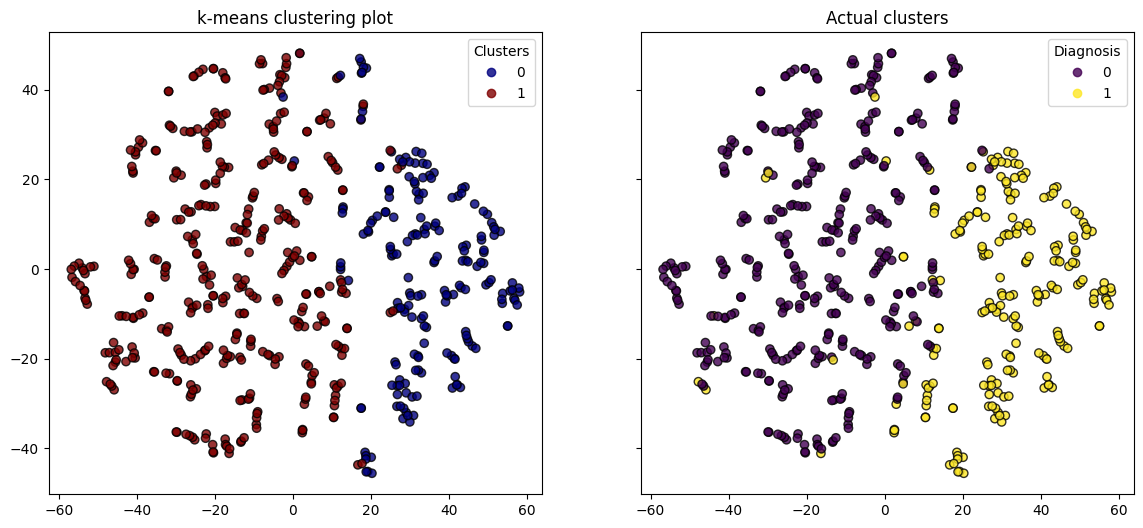

In [30]:
# Updated t-SNE with fewer iterations to avoid timeout
tsne = TSNE(verbose=1, perplexity=3, n_iter=500)
Y = tsne.fit_transform(X)

# Cluster using k-means
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, algorithm='elkan')
kY = kmeans.fit_predict(X)

# Plotting the clusters
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot k-means clustering results
scatter1 = ax1.scatter(Y[:, 0], Y[:, 1], c=kY, cmap="jet", edgecolor="k", alpha=0.8)
ax1.set_title('k-means clustering plot')
ax1.legend(*scatter1.legend_elements(), title="Clusters")

# Plot actual diagnosis clusters
scatter2 = ax2.scatter(Y[:, 0], Y[:, 1], c=datas['diagnosis'], cmap="viridis", edgecolor="k", alpha=0.8)
ax2.set_title('Actual clusters')
ax2.legend(*scatter2.legend_elements(), title="Diagnosis")

plt.show()


Text(0.5, 1.0, 'Actual clusters')

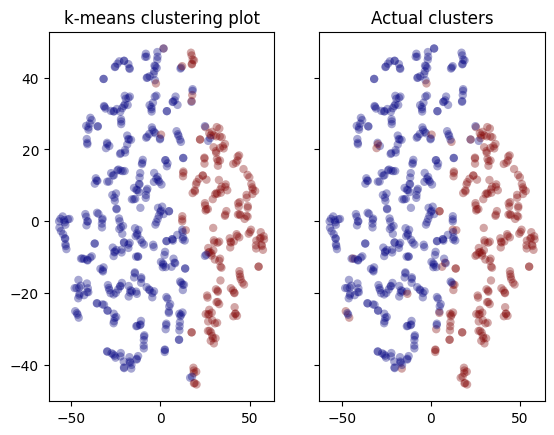

In [31]:
#Cluster using k-means
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='elkan')
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')


Text(0.5, 1.0, 'Actual clusters')

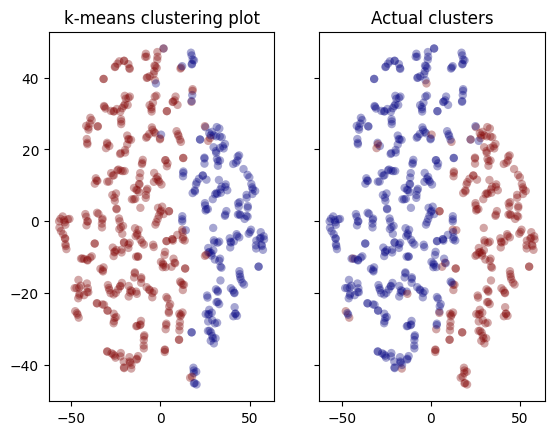

In [32]:
#Cluster using k-means
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

In [33]:
# Separate the 'id' column for later use and remove it from the features used in clustering
data = pd.read_csv(datafile)
data = data.drop(columns=['Unnamed: 32'], errors='ignore')
#data.head()
ids = data.columns


# Cluster using k-means
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='elkan')
kY = kmns.fit_predict(X)
print(kY)

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 0 

In [34]:
# Map k-means cluster labels to "benign" and "malignant" based on majority label in each cluster
# Assuming 'data' contains the actual 'diagnosis' labels for comparison

data['kmeans_cluster'] = kY
cluster_mapping = {}

# Determine which cluster corresponds to "benign" and "malignant"
for cluster in range(2):
    # Get actual diagnosis labels for samples in this cluster
    diagnosis_in_cluster = data[data['kmeans_cluster'] == cluster]['diagnosis']
    
    # Determine the majority class in this cluster (benign or malignant)
    majority_label = diagnosis_in_cluster.value_counts().idxmax()
    cluster_mapping[cluster] = majority_label

# Apply mapping to k-means predictions
data['classical diagnosis'] = data['kmeans_cluster'].map(cluster_mapping)
#data.to_csv('dataKY.csv', index=False)

# Save the classified dataset with tumor ID and benign/malignant labels based on k-means clustering
data[['id', 'classical diagnosis']].to_csv('classical_clusters.csv', index=False)
print("Classified clusters saved to classical_clusters.csv")

# Load the CSV file and display its first few rows
classified_clusters = pd.read_csv('classical_clusters.csv')
print(classified_clusters.head())

Classified clusters saved to classical_clusters.csv
         id classical diagnosis
0    842302                   M
1    842517                   M
2  84300903                   M
3  84348301                   M
4  84358402                   M


### Clustering using QAOA

In [35]:
# Save the t-SNE coordinates into a CSV file
coordinates_df = pd.DataFrame(Y, columns=['x', 'y'])
coordinates_df.to_csv('tsne_coordinates.csv', index=False)

# Display the first few rows of the CSV file
saved_coordinates = pd.read_csv('tsne_coordinates.csv')
print(saved_coordinates.head())


# Normalize the t-SNE coordinates as amplitudes for quantum encoding
from sklearn.preprocessing import normalize

# Assume Y contains your t-SNE results
amplitudes = normalize(Y, axis=0, norm='l2').flatten()  # Normalize and flatten

# Save the amplitudes to a file for reference
amplitude_df = pd.DataFrame({'amplitude': amplitudes})
amplitude_df.to_csv('tsne_amplitudes.csv', index=False)

# Load and display for confirmation
saved_amplitudes = pd.read_csv('tsne_amplitudes.csv')
print(saved_amplitudes.head())



           x          y
0  44.463825   5.302788
1  40.923534 -26.519526
2  44.387790   1.938085
3  44.155033  18.326391
4  26.695162 -30.608984
   amplitude
0   0.065233
1   0.009805
2   0.060039
3  -0.049034
4   0.065121


In [36]:
# Load the coordinates from the CSV file
coordinates_df = pd.read_csv('tsne_coordinates.csv')
x_coords = coordinates_df['x'].values
y_coords = coordinates_df['y'].values

# Flatten t-SNE coordinates into a single array
amplitudes = np.concatenate([x_coords, y_coords])

# Ensure the data size is a power of 2
N = len(amplitudes)
next_power_of_2 = 2**int(np.ceil(np.log2(N)))
if N != next_power_of_2:
    # Pad the array with zeros to make its size a power of 2
    padded_amplitudes = np.pad(amplitudes, (0, next_power_of_2 - N), mode='constant')
else:
    padded_amplitudes = amplitudes

# Prepare amplitudes for quantum state encoding
state_amplitudes = np.array(padded_amplitudes)
state_amplitudes /= np.linalg.norm(state_amplitudes)  # Ensure normalization

# Print a sample of the normalized amplitudes
print("Normalized Amplitudes for Quantum Encoding:", state_amplitudes[:10])
print("Size of padded amplitudes:", len(state_amplitudes))  # Confirm it's a power of 2


Normalized Amplitudes for Quantum Encoding: [0.05110066 0.04703193 0.05101328 0.05074578 0.03067978 0.03716818
 0.03293591 0.02732437 0.0364506  0.04160841]
Size of padded amplitudes: 2048


In [37]:
import rustworkx as rx
import matplotlib.pyplot as plt

# Load t-SNE coordinates from CSV
data = pd.read_csv("tsne_coordinates.csv")

# Initialize graph
graph_n = rx.PyGraph()

# Add each data point as a node
for index, row in data.iterrows():
    graph_n.add_node((row['x'], row['y']))

# Calculate all pairwise distances and store in a list
edges = []
for i in range(len(data)):
    for j in range(i + 1, len(data)):
        x1, y1 = data.iloc[i]['x'], data.iloc[i]['y']
        x2, y2 = data.iloc[j]['x'], data.iloc[j]['y']
        distance = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        edges.append((i, j, distance))  # Append (node1, node2, weight)

# Sort edges by weight in descending order
edges_sorted = sorted(edges, key=lambda x: x[2], reverse=True)

# Select the top `n` edges where `n` is the number of nodes
n = 2 * len(data)
#n = int(len(data) / 10)
selected_edges = edges_sorted[:n]

# Add the selected edges to the graph with weights
graph_n.add_edges_from([(e[0], e[1], e[2]) for e in selected_edges])

# Display the number of nodes and edges for verification
print(f"Graph has {graph_n.num_nodes()} nodes and {graph_n.num_edges()} edges.")


Graph has 569 nodes and 1138 edges.


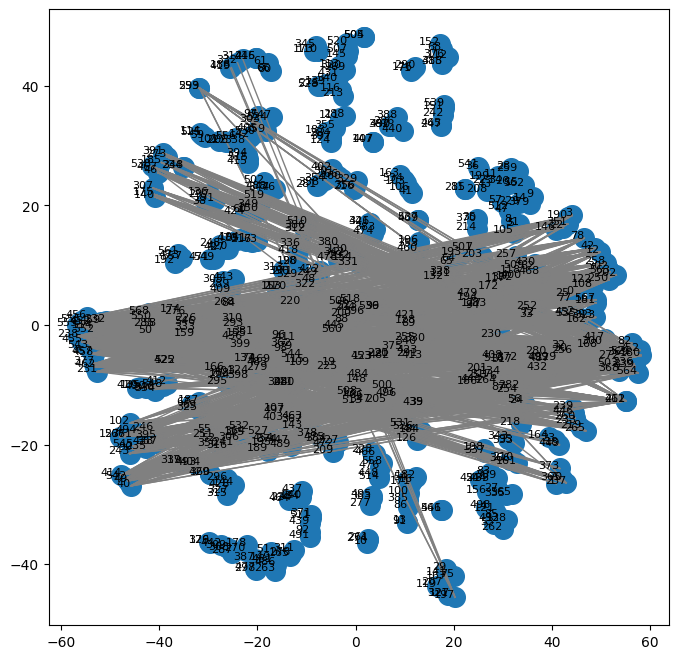

In [38]:
# Function to draw the graph
def draw_graph(graph, node_size=200, with_labels=True, width=1):
    pos = {i: (node[0], node[1]) for i, node in enumerate(graph.nodes())}
    plt.figure(figsize=(8, 8))

    # Draw nodes
    x_coords = [pos[i][0] for i in pos]
    y_coords = [pos[i][1] for i in pos]
    plt.scatter(x_coords, y_coords, s=node_size)

    # Draw edges
    for edge in graph.edge_list():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        plt.plot([x0, x1], [y0, y1], 'gray', lw=width)

    if with_labels:
        for i, (x, y) in pos.items():
            plt.text(x, y, str(i), fontsize=8, ha='right')

    plt.show()

# Call the draw function
draw_graph(graph_n)


In [39]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import QAOAAnsatz
import numpy as np

# Ensure the number of qubits matches the size of state_amplitudes
n_qubits_state = int(np.log2(len(state_amplitudes)))  # From state_amplitudes
print(f"Number of qubits required for state_amplitudes: {n_qubits_state}")

# Match the number of qubits to the graph size
n_qubits_graph = graph_n.num_nodes()  # From the graph
print(f"Number of qubits required for the graph: {n_qubits_graph}")

# Ensure consistency between state and graph qubits
n_qubits = max(n_qubits_state, n_qubits_graph)
print(f"Final number of qubits used: {n_qubits}")

# Check for consistency
if n_qubits_state < n_qubits:
    # Pad state_amplitudes with zeros if necessary
    padded_size = 2**n_qubits
    state_amplitudes = np.pad(state_amplitudes, (0, padded_size - len(state_amplitudes)), mode="constant")
    state_amplitudes /= np.linalg.norm(state_amplitudes)  # Renormalize
    print("State amplitudes padded and renormalized.")

# Log graph nodes and edges for debugging
print(f"Graph nodes: {graph_n.nodes()}")
print(f"Graph edges: {graph_n.edge_list()}")

# Validate edges to ensure they are within the range of qubits
valid_edges = [(i, j, weight) for i, j, weight in selected_edges if i < n_qubits and j < n_qubits]
print(f"Total edges: {len(selected_edges)}")
print(f"Valid edges after filtering: {len(valid_edges)}")

if not valid_edges:
    raise ValueError("No valid edges found. Ensure the graph node indices match the qubit range.")

# Construct the cost Hamiltonian
pauli_list = []

for edge in valid_edges:  # valid_edges contains (i, j, weight)
    i, j, weight = edge

    # Initialize a string of identity operators
    z_term = ["I"] * n_qubits

    # Replace the positions of qubits i and j with "Z"
    z_term[i] = "Z"
    z_term[j] = "Z"

    # Convert the list to a string
    z_term = "".join(z_term)

    # Add the term for -w_ij/2 * ZiZj
    pauli_list.append((z_term, -0.5 * weight))  # Scale by the weight

    # Add the constant term +w_ij/2 for each edge
    identity_term = "I" * n_qubits
    pauli_list.append((identity_term, 0.5 * weight))

# Create the cost Hamiltonian as a SparsePauliOp
cost_hamiltonian = SparsePauliOp.from_list(pauli_list)

# Print the constructed cost Hamiltonian (partial view)
print("Constructed Cost Hamiltonian (Partial):", cost_hamiltonian[:10])

# Define a custom mixer Hamiltonian (example: transverse-field)
mixer_pauli_list = [("X" * n_qubits, 1.0)]  # Example for n qubits
mixer_hamiltonian = SparsePauliOp.from_list(mixer_pauli_list)

# Create a quantum circuit and combine the amplitude-encoded state with QAOA
qc = QuantumCircuit(n_qubits)
qc.initialize(state_amplitudes, range(n_qubits))  # Initialize the quantum state

# Combine with QAOA ansatz
qaoa_circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, mixer_operator=mixer_hamiltonian, reps=1)
qaoa_circuit.compose(qc, inplace=True)  # Use the encoded state as input
qaoa_circuit.measure_all()

# Visualize the QAOA circuit
qaoa_circuit.draw("mpl", fold=False, scale=0.2, idle_wires=False)

Number of qubits required for state_amplitudes: 11
Number of qubits required for the graph: 569
Final number of qubits used: 569


TypeError: `pad_width` must be of integral type.

In [ ]:
from qiskit.circuit.library import QAOAAnsatz

circuit_n = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=1)
circuit_n.measure_all()

circuit_n.draw('mpl', fold=False, scale=0.2, idle_wires=False)

In [ ]:
from qiskit import transpile
from qiskit_aer import AerSimulator
import numpy as np

# Example: Set parameter values (replace with actual values as needed)
parameter_values = {param: np.random.rand() for param in circuit_n.parameters}

# Assign the parameters directly
bound_circuit = circuit_n.assign_parameters(parameter_values)

# Set up the AerSimulator
simulator = AerSimulator(method='statevector')

# Transpile the circuit for the AerSimulator
transpiled_circuit = transpile(bound_circuit, backend=simulator, optimization_level=3)

# Run the transpiled circuit on the simulator
result = simulator.run(transpiled_circuit).result()

# Draw the transpiled circuit
transpiled_circuit.draw('mpl', fold=False, scale=0.1, idle_wires=False)


In [ ]:
import numpy as np
from qiskit.circuit.library import QAOAAnsatz
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_histogram

# Define parity array for expectation value evaluation
_PARITY = np.array([-1 if bin(i).count("1") % 2 else 1 for i in range(256)], dtype=np.complex128)

# Evaluate the expectation value of a state with respect to a given Hamiltonian
def evaluate_sparse_pauli(state: int, observable: SparsePauliOp) -> complex:
    packed_uint8 = np.packbits(observable.paulis.z, axis=1, bitorder="little")
    state_bytes = np.frombuffer(state.to_bytes(packed_uint8.shape[1], "little"), dtype=np.uint8)
    reduced = np.bitwise_xor.reduce(packed_uint8 & state_bytes, axis=1)
    return np.sum(observable.coeffs * _PARITY[reduced])

# Find the bitstring with the minimum cost
def best_solution(samples, hamiltonian):
    min_cost = float('inf')
    min_sol = None
    for bit_str in samples.keys():
        candidate_sol = int(bit_str[::-1], 2)  # Convert bitstring to integer with little-endian order
        fval = evaluate_sparse_pauli(candidate_sol, hamiltonian).real
        if fval < min_cost:
            min_cost = fval
            min_sol = candidate_sol
    return min_sol

# Set up the AerSimulator
simulator = AerSimulator(method='statevector')

# Run on the simulator
result = simulator.run(transpiled_circuit, shots=10240).result()
counts = result.get_counts()

# Find the best solution from the measurement results
best_sol_int = best_solution(counts, cost_hamiltonian)

# Convert the integer solution back to a bitstring, reversed for endianness consistency
best_sol_bitstring = format(best_sol_int, f'0{len(graph_n)}b')[::-1]

def canonical_bitstring(bitstring):
    if bitstring.count('0') > bitstring.count('1'):
        return bitstring
    else:
        return ''.join('1' if b == '0' else '0' for b in bitstring)

best_sol_bitstring = canonical_bitstring(best_sol_bitstring)


# Display the results
print("Best Solution Bitstring:", best_sol_bitstring)
print("Measurement Result Distribution:")
plot_histogram(counts)


In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(graph, bitstring):
    pos = {i: (node[0], node[1]) for i, node in enumerate(graph.nodes())}
    plt.figure(figsize=(8, 8))
    
    # Draw nodes, color-coding based on the bitstring values
    colors = ['red' if bitstring[i] == '1' else 'blue' for i in range(len(bitstring))]
    for i, color in enumerate(colors):
        plt.scatter(*pos[i], color=color, s=100, label=f'Cluster {bitstring[i]}')

    # Draw edges
    for edge in graph.edge_list():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        plt.plot([x0, x1], [y0, y1], 'gray', lw=0.5)
    
    plt.title("QAOA Max-Cut Clustering Result")
    plt.show()

plot_clusters(graph_n, best_sol_bitstring)


In [ ]:
# Function to print the 1s and 0s in the bitstring
def print_bitstring_details(bitstring):
    print("Bitstring Details:")
    for i, bit in enumerate(bitstring):
        print(f"Index: {i}, Value: {bit}")

# Assuming `best_sol_bitstring` is the bitstring you want to inspect
print_bitstring_details(best_sol_bitstring)

In [ ]:
import pandas as pd

# Load the tumor data
data = pd.read_csv(datafile)  # Adjust the path as necessary

# Check the columns in your data to identify the correct column name for IDs
print("Available columns:", data.columns)

# Replace 'id' with the correct column name for tumor IDs in your dataset
tumor_data = data[['id']]  # Adjust 'id' if necessary

# Assume `best_sol_bitstring` is the bitstring output from your QAOA code
# Replace this with your actual bitstring
bitstring = list(best_sol_bitstring)  # Convert the bitstring to a list if it's a string

# Validate the lengths
if len(bitstring) != len(tumor_data):
    raise ValueError("Length of the bitstring does not match the number of tumor IDs")

# Map the bitstring values to 'M' and 'B'
tumor_data['qaoa diagnosis'] = ['B' if bit == '0' else 'M' for bit in bitstring]

# Save the result to a CSV file
tumor_data.to_csv('qaoa_clusters.csv', index=False)

print("Saved QAOA clusters to 'qaoa_clusters.csv'")

# Load and display the saved file for confirmation
qaoa_clusters = pd.read_csv('qaoa_clusters.csv')
print("Preview of QAOA clusters:")
print(qaoa_clusters.head())

In [ ]:
def calculate_cut_value(graph, bitstring):
    cut_value = 0
    for edge in graph.edge_list():
        if bitstring[edge[0]] != bitstring[edge[1]]:  # Different clusters
            cut_value += graph.get_edge_data(edge[0], edge[1])
    return cut_value

cut_value = calculate_cut_value(graph_n, best_sol_bitstring)
print(f"Cut Value: {cut_value:.0f} out of {graph_n.num_edges()}.")


### Comparing Results 

In [ ]:
import pandas as pd

# Load the real-world diagnosis data
real_data = pd.read_csv(datafile)

# Extract the id and real-world diagnosis columns
real_diagnosis = real_data[['id', 'diagnosis']]  # Adjust 'id' and 'diagnosis' if needed

# Load the two classification CSV files
classical_clusters = pd.read_csv('classical_clusters.csv')
qaoa_clusters = pd.read_csv('qaoa_clusters.csv')

# Merge the classical and QAOA classifications on 'id'
combined_clusters = pd.merge(classical_clusters, qaoa_clusters, on='id', suffixes=('_classical', '_qaoa'))

# Merge the real-world diagnosis with the combined clusters
combined_clusters = pd.merge(real_diagnosis, combined_clusters, on='id')

# Rename columns for clarity
combined_clusters.rename(
    columns={
        'diagnosis': 'real diagnosis',
        'diagnosis_classical': 'classical diagnosis',
        'diagnosis_qaoa': 'qaoa diagnosis'
    },
    inplace=True
)

# Save the final combined data to a new CSV file
combined_clusters.to_csv('final_combined_clusters.csv', index=False)

print("Final combined clusters saved to 'final_combined_clusters.csv'")

# Display the first few rows of the final combined file for confirmation
print("Preview of final combined clusters:")
print(combined_clusters.head())


In [ ]:
import pandas as pd

# Load the combined data
combined_clusters = pd.read_csv('final_combined_clusters.csv')

# Define a function to calculate percent error
def calculate_percent_error(real_diagnosis, predicted_diagnosis):
    # Count mismatches between real and predicted diagnoses
    mismatches = sum(real_diagnosis != predicted_diagnosis)
    # Calculate percent error
    percent_error = (mismatches / len(real_diagnosis)) * 100
    return percent_error

# Calculate percent error for k-means classification
kmeans_error = calculate_percent_error(
    combined_clusters['real diagnosis'],
    combined_clusters['classical diagnosis']
)

# Calculate percent error for QAOA classification
qaoa_error = calculate_percent_error(
    combined_clusters['real diagnosis'],
    combined_clusters['qaoa diagnosis']
)

# Print the results
print(f"K-means Percent Error: {kmeans_error:.2f}%")
print(f"QAOA Percent Error: {qaoa_error:.2f}%")
